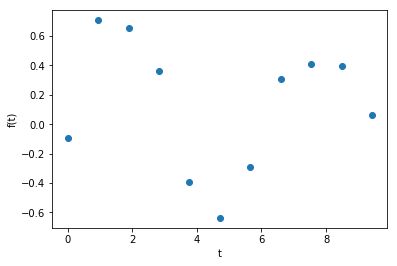

[ 0.90876312  1.01235549 -0.07304788  0.08131184]


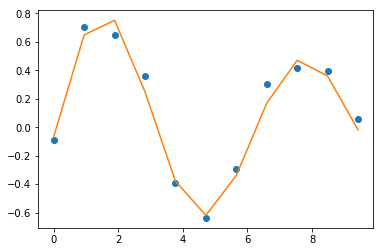

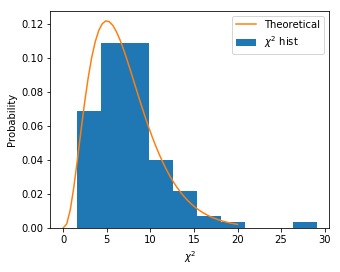

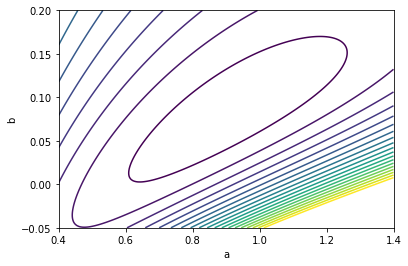

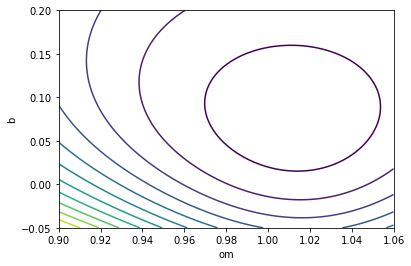

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# If we perform many instances of an experiment, e.g. output f(t) as a 
# function of time t, we can get a distribution of the values of f for a 
# given t. But what if we perform just one experiment?


# We perform just one experiment, with data given in 'dampedosc.dat'
time = np.linspace(0,3*np.pi,11)
dataY = np.empty(11)

for i in range(0,11):
    dataY[i] = np.sin(time[i])*np.exp(-1*time[i]/10) + 0.4*np.random.rand() - 0.2
    
plt.plot(time, dataY, 'o')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()
# Our objective is to use the data to estimate the best set of
# parameters -- a, om, phi, and b

# The fitting function is that of a damped oscillation.
# The parameters to be determined are the amplitude 'a', 
# angular speed 'om', phase 'phi' and damping factor 'b'.

# define the fitting function
def fitfunc(t, a, om, phi, b):
    return a*np.sin(om*t + phi) * np.exp(-b*t)

# In this example, we have N = 11 datapoints and M = 4 parameters.
# Let's perform a nonlinear fit using a built-in function in scipy
# and look at the resulting output and its plot
fit = curve_fit(fitfunc, time, dataY, p0=[1.1, 1.1, 0.1, 0.2])[0]
# Run help(curve_fit). what's p0? 
'''p0 is the parameters of the model function'''

print(fit)
plt.plot(time, dataY, 'o')
plt.plot(time, fitfunc(time, *fit))
#t = np.linspace(0,10,100)
#plt.plot(t, fitfunc(t, *fit))
plt.show()

# But let's digress a bit... 

# In a chi^2 distribution (or chi2 in scipy.stats and Eq. 1.29 in Kinzel), 
# the number of degrees of freedom is given by the number of points minus 
# the number of parameters or N - M. In our case, that's 11 - 4 = 7.

# We will use the chi^2 square distribution to give an estimate of the
# error bars for the parameter fit that we obtained.

# THIS IS IMPORTANT: In using the chi^2 distribution, we assume that 
# errors that got added is Gaussian distributed with vanishing mean
# and variances sigma_i^2 (see page 24); i.e. the errors are uncorrelated
# and follow a Gaussian distribution.

# In which case, the "best" set of parameters (parameters are denoted as 
# bold{a}) in Kinzel and which we try to look for in this exercise 
# as a0, om0, phi0, and b0 is the vector whose components minimize the
# qaudratic deviation chi^2, where chi^2 is defined as Eq. 1.28

# One can verify this in fact by generating a bunch of datasets 
# Exercise: Using the code from gendata_book_post.py, generate at
# least 100 datasets, calculate chi^2 using Eq. 1.28 and show that
# the distribution of chi^2(bold{a0}) is given by Eq. 1.29

# The chi^2 distribution PDF (Eq. 1.29) is available from scipy.stats
#dt = np.loadtxt('dampedosc.dat')
chi2.pdf(np.linspace(0,20),7)
#plt.plot(a,b)
#plt.show()
# Use the help function to figure out the parameters: help(chi2.pdf)
# Tip: check out the other functions available help(chi2)
'''Exercise'''
ts = []
ys = []
chisums = []
als = []
ohms = []
phis = []
bs = []
num = np.arange(100)
for value in range(len(num)):
#    data = np.loadtxt('dampedocs' + str(num[value]) + '.dat')
    t = np.linspace(0, 3*np.pi, 11)
    ts.append(t)
    y = np.sin(t)*np.exp(-t/10.) + 0.4*np.random.normal(scale=0.3,size=11)
    ys.append(y)
    def fitfunc(t, a, om, phi, b):
        return a*np.sin(om*t + phi) * np.exp(-b*t)
    fit = curve_fit(fitfunc, t, y, p0=[1.1, 1.1, 0.1, 0.2])[0]
    als.append(fit[0])
    ohms.append(fit[1])
    phis.append(fit[2])
    bs.append(fit[3])
    sigma = 2.0/150.0
    Yi = y
    g = fitfunc(t, *fit)
    chi = ((Yi-g)**2)/sigma
    chisum = sum(chi)
    chisums.append(chisum)
#print chisums
np.savetxt('chisquaredlist',chisums)
plt.figure(figsize=(5,4))
plt.hist(chisums, normed=True, label = '$\chi^2$ hist')
x = np.linspace(0,20)
y = chi2.pdf(np.linspace(0,20),7)
plt.plot(x,y, label = 'Theoretical')
plt.xlabel('$\chi^2$')
plt.ylabel('Probability')
plt.legend()
plt.savefig('hist.pdf')
plt.savefig('hist.png')
plt.show()

'''Contour Plots''' 
to = time
yo = dataY
contour =  curve_fit(fitfunc, to, yo, p0=[1.1, 1.1, 0.1, 0.2])[0]
sigma2 = 2./150
a1 = contour[0]
om1 = contour[1]
phi1 = contour[2]


conta, contb = np.meshgrid(np.linspace(0.4,1.4,200),np.linspace(-0.05,0.2,200))
contour_chi2 = np.sum([(yo[i]-fitfunc(to[i],conta, om1, phi1, contb))**2/sigma2 for i in range(len(to))], axis=0)
plt.contour(conta,contb,contour_chi2, levels=[i for i in np.linspace(0,200,20)])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

contom, contb1 = np.meshgrid(np.linspace(0.9,1.06,200),np.linspace(0,0.16,200))
contour_chi2 = np.sum([(yo[i]-fitfunc(to[i],a1,contom,phi1,contb1))**2/sigma2 for i in range(len(to))], axis=0)
plt.contour(contom,contb,contour_chi2, levels=[i for i in np.linspace(0,200,20)])
plt.xlabel('om')
plt.ylabel('b')
plt.show()